**2. Huber regression**

Huber regression has a regularization parameter $\alpha$ and a parameter $\epsilon$ that controls for the robustness. Since we use regularization the approach is usually to standardize the features to put equal weights on them (https://stats.stackexchange.com/questions/86434/is-standardisation-before-lasso-really-necessary). The data is therefore standardized before the estimation. A validation set is used to fine-tune the hyper-parameters.

*Aggregation by suburbs*

Untransformed
-------------
R2 train: 0.60 / RMSE train 0.17 / MAE train 0.13 / Nobs: 14261
R2 test: 0.62 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.47 / RMSE train 62.94 / MAE train 37.52 / Nobs: 14261
R2 test: 0.48 / RMSE test 61.85 / MAE test 36.66 / Nobs: 4451



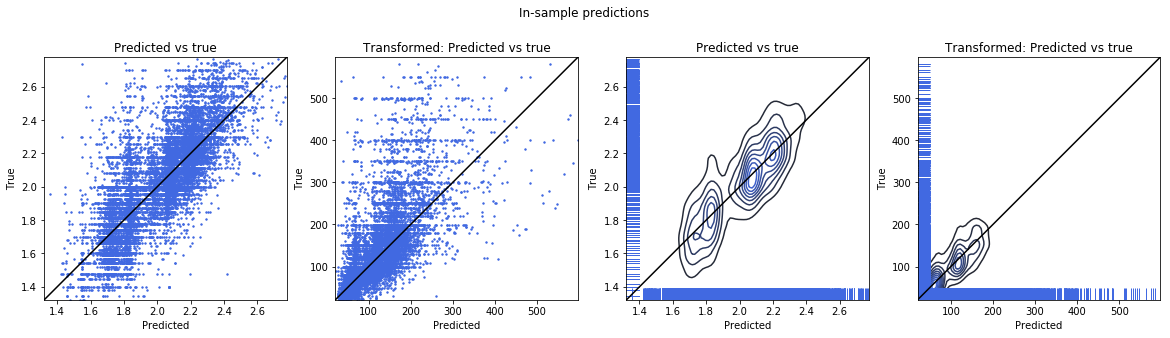

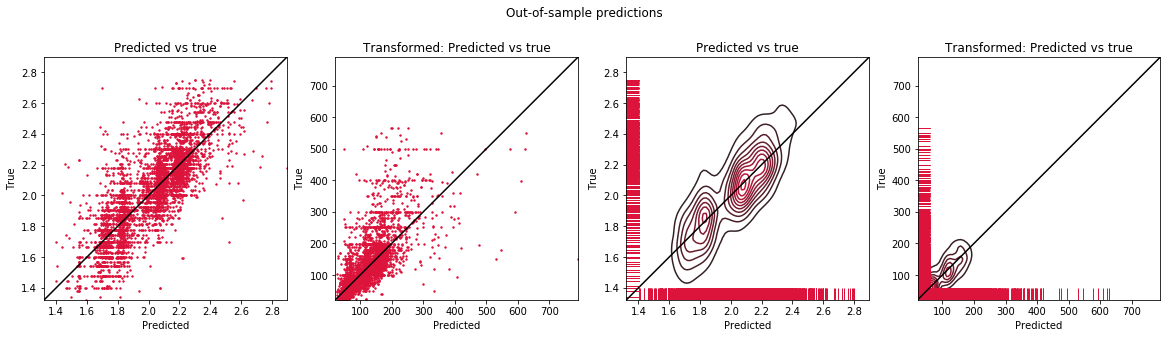

In [295]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
huber_suburb = print_results('Huber_regression_suburbs.p', test_tpl, train_tpl, 'both', True)

In [296]:
best_params = huber_suburb['fitted_model'].best_params_
best_params

{'huber__alpha': 0.0001, 'huber__epsilon': 1}

Next, we create a model with the best parameters and extract the model coefficients.

In [297]:
X_train, y_train = prepare_datasets(X_train_suburb, y_train_suburb)
regr = HuberRegressor(alpha=best_params['huber__alpha'], epsilon=best_params['huber__epsilon'])
model = Pipeline([('scaler', StandardScaler()), ('huber', regr)])
model.fit(X_train, y_train)
# https://stackoverflow.com/questions/28822756/getting-model-attributes-from-scikit-learn-pipeline/28837740
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_suburb.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_suburb_same_room_type,0.005027
Air_calculated_host_listings_count,-0.003200
Air_bathrooms,0.021617
Air_beds,-0.001166
Air_bedrooms,0.066234
Air_accommodates,0.035110
Air_extra_people,0.003516
Air_guests_included,0.006639
Air_distance_to_CBD,-0.048211
Air_property_type_2_House_Cottage_Villa,0.005307


`statsmodels`' Huber regression coefficients are **different** to `sklearn`'s. We also notice that there are no parameters like `alpha` and `epsilon`. 

In [298]:
X, y = prepare_datasets(X_train_suburb, y_train_suburb)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_suburb.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
huber_suburb_sm = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(huber_suburb_sm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          Air_log_price   No. Observations:                14261
Model:                            RLM   Df Residuals:                    14215
Method:                          IRLS   Df Model:                           45
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 08 Jul 2020                                         
Time:                        19:12:29                                         
No. Iterations:                    24                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

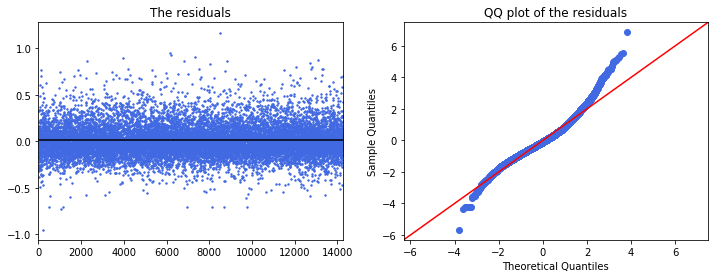

In [299]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
mean = np.mean(huber_suburb_sm.resid)
ax[0].scatter(x=range(huber_suburb_sm.resid.shape[0]), y=huber_suburb_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, huber_suburb_sm.resid.shape[0])
stdized = (huber_suburb_sm.resid - np.mean(huber_suburb_sm.resid)) / np.std(huber_suburb_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 500m*

Untransformed
-------------
R2 train: 0.62 / RMSE train 0.16 / MAE train 0.12 / Nobs: 13230
R2 test: 0.64 / RMSE test 0.16 / MAE test 0.12 / Nobs: 3739

Transformed
-----------
R2 train: 0.49 / RMSE train 61.46 / MAE train 36.65 / Nobs: 13230
R2 test: 0.50 / RMSE test 60.84 / MAE test 35.88 / Nobs: 3739



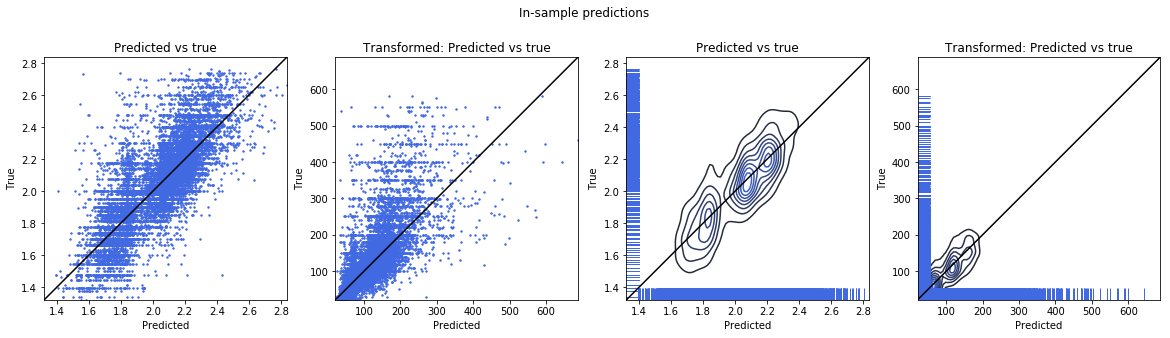

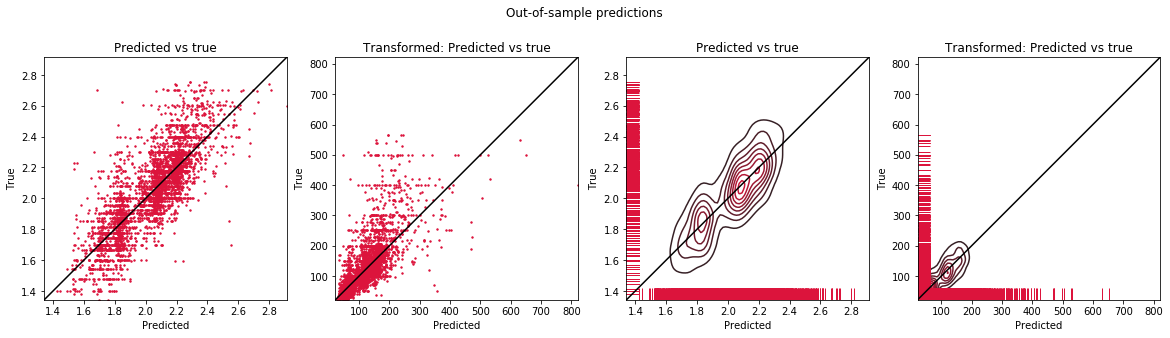

In [300]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
huber_500m = print_results('Huber_regression_500m.p', test_tpl, train_tpl, 'both', True)

In [301]:
best_params = huber_500m['fitted_model'].best_params_
best_params

{'huber__alpha': 0.001, 'huber__epsilon': 1}

Again, we extract the coefficients.

In [302]:
X_train, y_train = prepare_datasets(X_train_500m, y_train_500m)
regr = HuberRegressor(alpha=best_params['huber__alpha'], epsilon=best_params['huber__epsilon'])
model = Pipeline([('scaler', StandardScaler()), ('huber', regr)])
model.fit(X_train, y_train)
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_500m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_500m_same_room_type,0.071056
Air_calculated_host_listings_count,-0.003406
Air_bathrooms,0.020964
Air_beds,-0.000405
Air_bedrooms,0.065059
Air_accommodates,0.029266
Air_extra_people,0.003906
Air_guests_included,0.006065
Air_distance_to_CBD,-0.051336
Air_property_type_2_House_Cottage_Villa,0.009909


A comparison with `statsmodels`'s values is is shown below. **The values differ from the ones from sklearn.**

In [303]:
X, y = prepare_datasets(X_train_500m, y_train_500m)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_500m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
huber_500m_sm = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(huber_500m_sm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          Air_log_price   No. Observations:                13230
Model:                            RLM   Df Residuals:                    13184
Method:                          IRLS   Df Model:                           45
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 08 Jul 2020                                         
Time:                        19:13:27                                         
No. Iterations:                    25                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

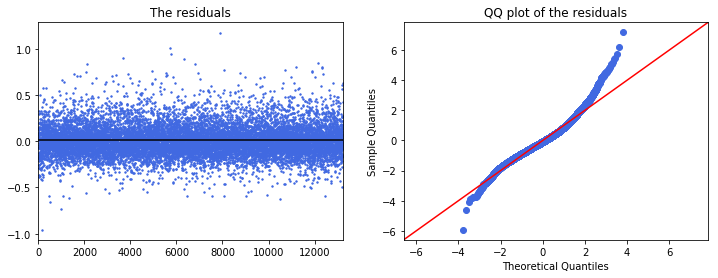

In [304]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
mean = np.mean(huber_500m_sm.resid)
ax[0].scatter(x=range(huber_500m_sm.resid.shape[0]), y=huber_500m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, huber_500m_sm.resid.shape[0])
stdized = (huber_500m_sm.resid - np.mean(huber_500m_sm.resid)) / np.std(huber_500m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 100m*

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.15 / MAE train 0.11 / Nobs: 9203
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.11 / Nobs: 2177

Transformed
-----------
R2 train: 0.48 / RMSE train 60.00 / MAE train 35.94 / Nobs: 9203
R2 test: 0.51 / RMSE test 54.12 / MAE test 34.01 / Nobs: 2177



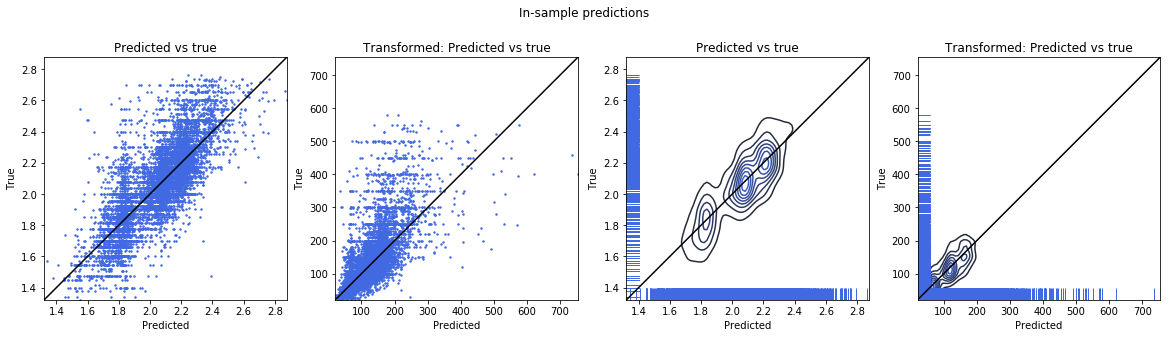

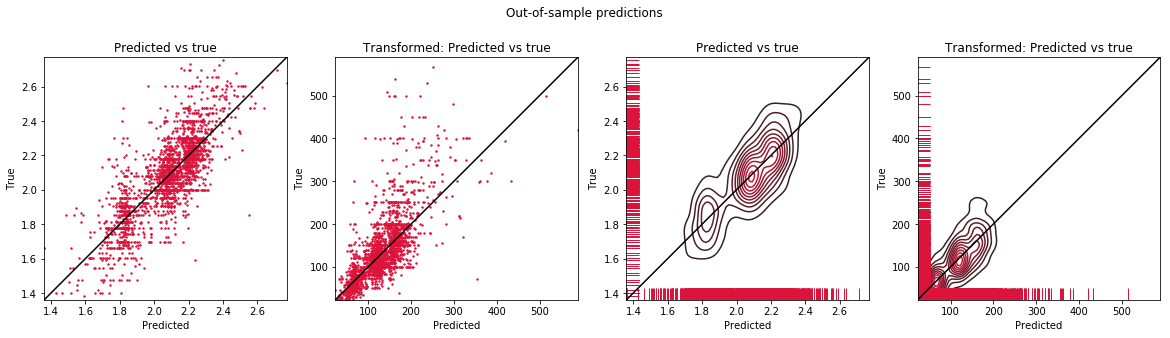

In [305]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
huber_100m = print_results('Huber_regression_100m.p', test_tpl, train_tpl, 'both', True)

In [306]:
best_params = huber_100m['fitted_model'].best_params_
best_params

{'huber__alpha': 0.0001, 'huber__epsilon': 1}

In [307]:
X_train, y_train = prepare_datasets(X_train_100m, y_train_100m)
regr = HuberRegressor(alpha=best_params['huber__alpha'], epsilon=best_params['huber__epsilon'])
model = Pipeline([('scaler', StandardScaler()), ('huber', regr)])
model.fit(X_train, y_train)
# https://stackoverflow.com/questions/28822756/getting-model-attributes-from-scikit-learn-pipeline/28837740
model.steps[1][1].coef_
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_100m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_100m_same_room_type,0.050610
Air_calculated_host_listings_count,-0.004550
Air_bathrooms,0.021518
Air_beds,0.004303
Air_bedrooms,0.063628
Air_accommodates,0.020474
Air_extra_people,0.002806
Air_guests_included,0.005354
Air_distance_to_CBD,-0.053251
Air_property_type_2_House_Cottage_Villa,0.004976


A comparison with `statsmodels`'s values is is shown below. **The values differ from the ones from sklearn.**

In [308]:
X, y = prepare_datasets(X_train_100m, y_train_100m)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_100m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
huber_100m_sm = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(huber_100m_sm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          Air_log_price   No. Observations:                 9203
Model:                            RLM   Df Residuals:                     9157
Method:                          IRLS   Df Model:                           45
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 08 Jul 2020                                         
Time:                        19:14:04                                         
No. Iterations:                    22                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

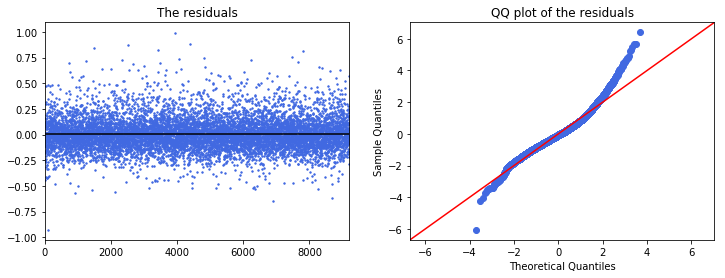

In [309]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
mean = np.mean(huber_100m_sm.resid)
ax[0].scatter(x=range(huber_100m_sm.resid.shape[0]), y=huber_100m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, huber_100m_sm.resid.shape[0])
stdized = (huber_100m_sm.resid - np.mean(huber_100m_sm.resid)) / np.std(huber_100m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 50m*

Untransformed
-------------
R2 train: 0.59 / RMSE train 0.15 / MAE train 0.11 / Nobs: 6522
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.10 / Nobs: 1340

Transformed
-----------
R2 train: 0.45 / RMSE train 59.75 / MAE train 35.71 / Nobs: 6522
R2 test: 0.50 / RMSE test 51.53 / MAE test 32.66 / Nobs: 1340



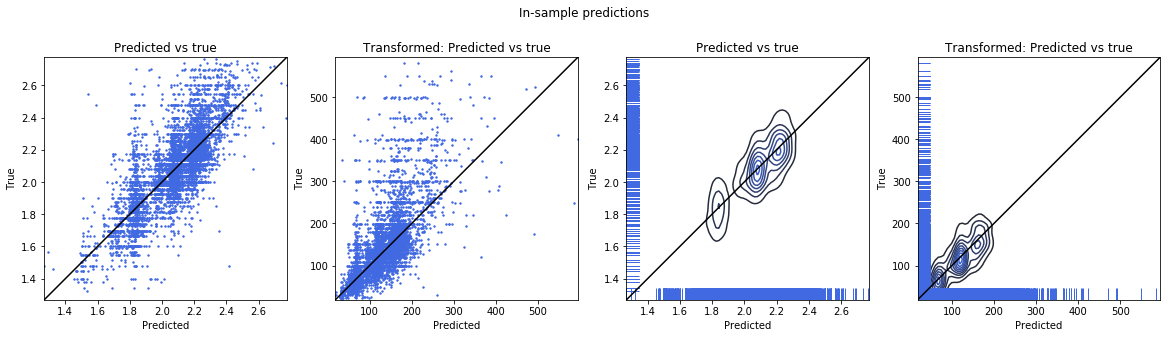

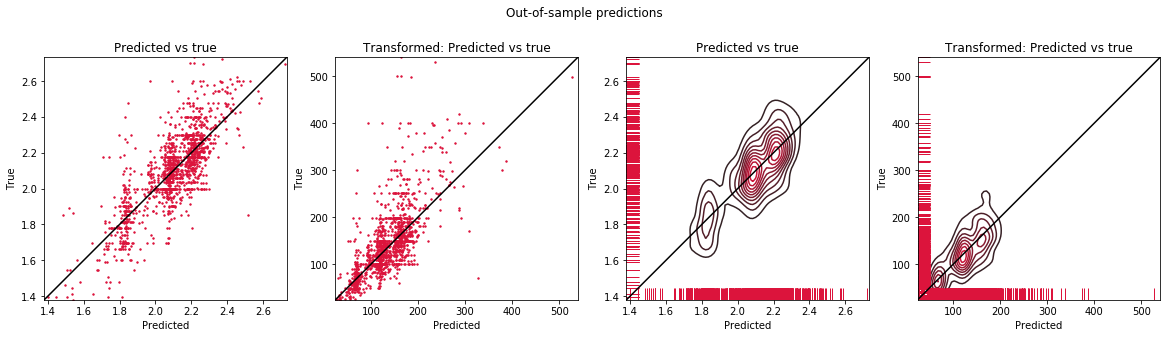

In [310]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
huber_50m = print_results('Huber_regression_50m.p', test_tpl, train_tpl, 'both', True)

In [311]:
best_params = huber_50m['fitted_model'].best_params_
best_params

{'huber__alpha': 1.0, 'huber__epsilon': 1}

In [312]:
X_train, y_train = prepare_datasets(X_train_50m, y_train_50m)
regr = HuberRegressor(alpha=best_params['huber__alpha'], epsilon=best_params['huber__epsilon'])
model = Pipeline([('scaler', StandardScaler()), ('huber', regr)])
model.fit(X_train, y_train)
# https://stackoverflow.com/questions/28822756/getting-model-attributes-from-scikit-learn-pipeline/28837740
model.steps[1][1].coef_
df = pd.DataFrame(data={'Coefficient': list(model.steps[1][1].coef_)})
df.index = [c for c in list(train_50m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_50m_same_room_type,0.025290
Air_calculated_host_listings_count,-0.004081
Air_bathrooms,0.024187
Air_beds,0.007393
Air_bedrooms,0.064319
Air_accommodates,0.015954
Air_extra_people,0.003901
Air_guests_included,0.005371
Air_distance_to_CBD,-0.043499
Air_property_type_2_House_Cottage_Villa,0.000837


A comparison with `statsmodels`'s values is is shown below. **The values differ from the ones from sklearn.**

In [313]:
X, y = prepare_datasets(X_train_50m, y_train_50m)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_50m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
huber_50m_sm = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(huber_50m_sm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          Air_log_price   No. Observations:                 6522
Model:                            RLM   Df Residuals:                     6476
Method:                          IRLS   Df Model:                           45
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 08 Jul 2020                                         
Time:                        19:14:27                                         
No. Iterations:                    31                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

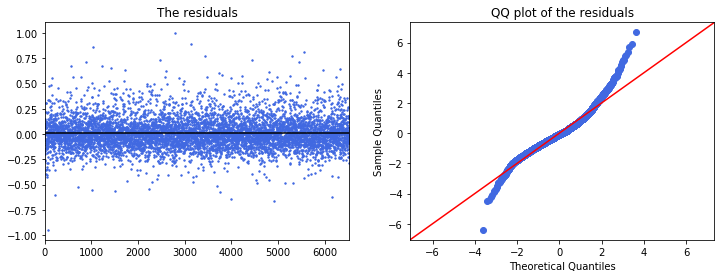

In [314]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
mean = np.mean(huber_50m_sm.resid)
ax[0].scatter(x=range(huber_50m_sm.resid.shape[0]), y=huber_50m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, huber_50m_sm.resid.shape[0])
stdized = (huber_50m_sm.resid - np.mean(huber_50m_sm.resid)) / np.std(huber_50m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");